## Data transform 2

For this, we will create a dataset where we will retain all outliers but focus on correcting skewers 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# Read in the data
num_df = pd.read_csv('../data/raw/numerical.csv')

display(num_df)

,sqft_above,sqft_lot15,sqft_living15
0,1180,5650,1340
1,2170,7639,1690
2,770,8062,2720
3,1050,5000,1360
4,1680,7503,1800
...,...,...,...
21592,1530,1509,1530
21593,2310,7200,1830
21594,1020,2007,1020
21595,1600,1287,1410


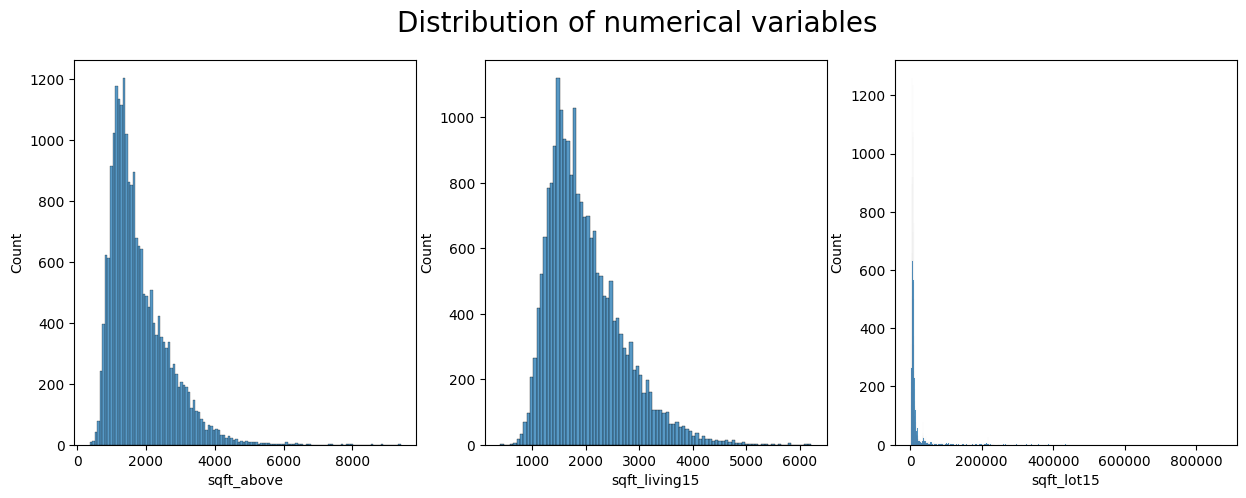

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of numerical variables', fontsize=20)
sns.histplot(ax=axes[0], data=num_df, x='sqft_above')
sns.histplot(ax=axes[1], data=num_df, x='sqft_living15')
sns.histplot(ax=axes[2], data=num_df, x='sqft_lot15')
plt.show()

In [91]:
#see skewness
print(num_df.skew())

sqft_above       1.447434
sqft_lot15       9.524362
sqft_living15    1.106875
dtype: float64


we will apply power tranformation on columns with value above 1

In [92]:
from sklearn.preprocessing import PowerTransformer

In [93]:
#transform data
pt = PowerTransformer()
pt.fit(num_df)


PowerTransformer()

In [94]:
num_transformed= pt.transform(num_df)

In [95]:
#cast to dataframe
num_transformed_df = pd.DataFrame(num_transformed, columns=num_df.columns)

In [96]:
#save transformed data
import os
import pickle
path = "../transformers/"
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "num_transformer.pkl" 
with open(path+filename, "wb") as file:
  pickle.dump(pt, file)

In [97]:
num_transformed_df

,sqft_above,sqft_lot15,sqft_living15
0,-0.737418,-0.341970,-1.043506
1,0.705741,0.057869,-0.294277
2,-1.882200,0.126750,1.121919
3,-1.038881,-0.511161,-0.994463
4,0.125114,0.034741,-0.097540
...,...,...,...
21592,-0.096146,-2.414324,-0.610480
21593,0.842224,-0.018655,-0.046444
21594,-1.115067,-1.918077,-1.977481
21595,0.010309,-2.704055,-0.875644


In [98]:
#check skewness
print(num_transformed_df.skew())


sqft_above       0.013949
sqft_lot15      -0.115138
sqft_living15    0.005725
dtype: float64


In [99]:
display(num_transformed_df.shape)


(21597, 3)

## Categorical data

In [100]:
#import categorical data
cat_df = pd.read_csv('../data/cleaned/categorical_final_copy.csv')

In [101]:

cat_df.shape

(21597, 11)

In [102]:
cat_df.head()

,id,waterfront,view,condition,grade,bedrooms,bathrooms,sqft_basement_cat,floors,yr_built_cat,zip
0,7129300520,0,0,3,7,3,1.00,1,1.0,1,981
1,6414100192,0,0,3,7,3,2.25,2,2.0,1,981
2,5631500400,0,0,3,6,2,1.00,1,1.0,1,980
3,2487200875,0,0,5,7,4,3.00,3,1.0,1,981
4,1954400510,0,0,3,8,3,2.00,1,1.0,1,980


## further handling location
we are going to handle zipcode, dropping the long and latituide . and encoding zip column

now we focus on encoding zip 

In [103]:
cat_df['zip'].value_counts()

zip
980    12624
981     8973
Name: count, dtype: int64

there are only two groups in the zip code, so we will use a simple label encoder

In [104]:
#encode zip with label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_df['zip'] = le.fit_transform(cat_df['zip'])



In [105]:
#save label encoder
path = "../encoders/"
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "label_encoder_for_zipcode.pkl" 
with open(path+filename, "wb") as file:
  pickle.dump(le, file)

In [106]:
cat_df['zip'].value_counts()

zip
0    12624
1     8973
Name: count, dtype: int64

In [107]:
cat_df.columns

Index(['id', 'waterfront', 'view', 'condition', 'grade', 'bedrooms',
       'bathrooms', 'sqft_basement_cat', 'floors', 'yr_built_cat', 'zip'],
      dtype='object')

In [108]:
#import target
target_df = pd.read_csv('../data/cleaned/target.csv')

In [109]:
target_df.shape

(21597, 2)

#concat the three dataframes

In [110]:
df = pd.concat([num_transformed_df, cat_df, target_df], axis=1)

df.shape

(21597, 16)

In [111]:
df['sqft_basement_cat'].value_counts()

sqft_basement_cat
1    13110
3     4013
2     2459
4     2015
Name: count, dtype: int64

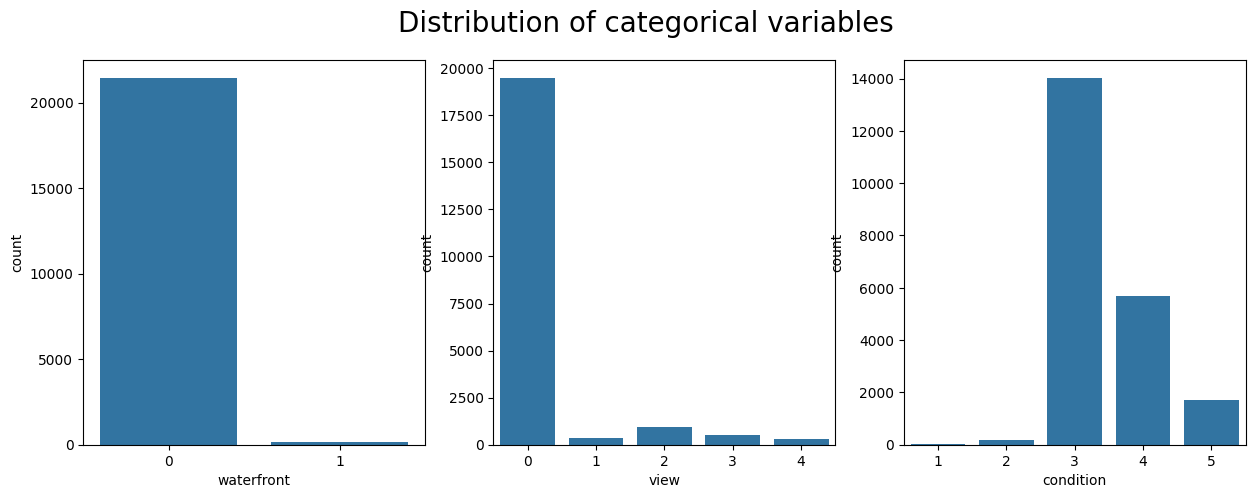

In [112]:
#visualize value counts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of categorical variables', fontsize=20)
sns.countplot(ax=axes[0], data=df, x='waterfront')
sns.countplot(ax=axes[1], data=df, x='view')
sns.countplot(ax=axes[2], data=df, x='condition')
plt.show()

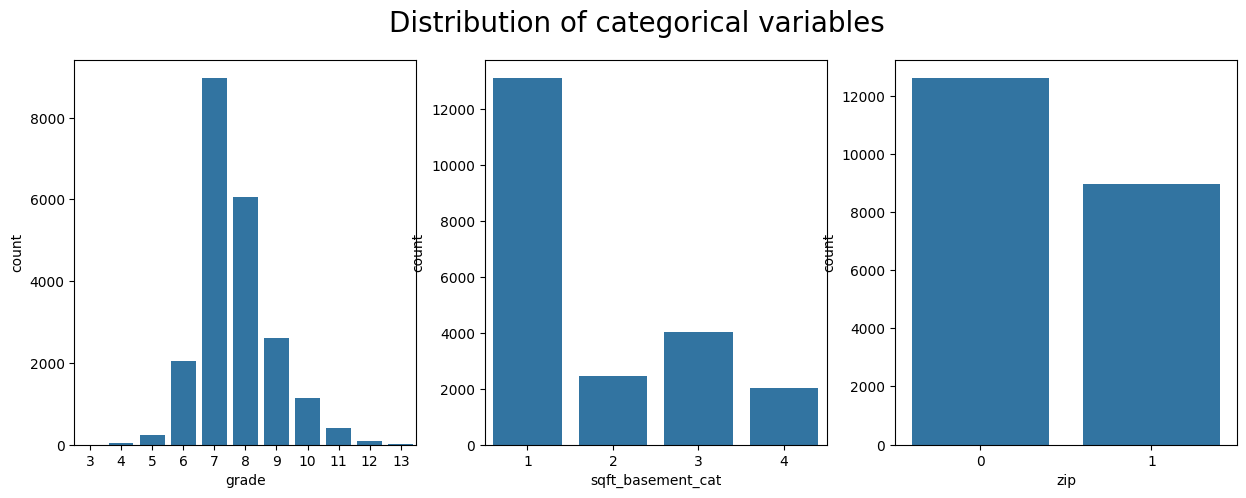

In [113]:
#visualize value counts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of categorical variables', fontsize=20)
sns.countplot(ax=axes[0], data=df, x='grade')
sns.countplot(ax=axes[1], data=df, x='sqft_basement_cat')
sns.countplot(ax=axes[2], data=df, x='zip')
plt.show()

<Axes: xlabel='bedrooms', ylabel='count'>

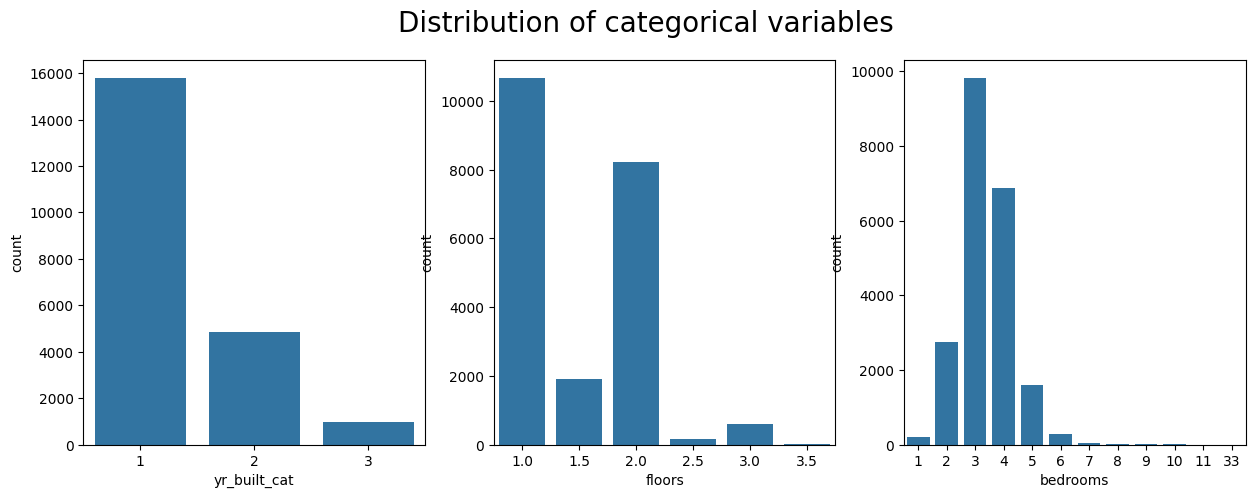

In [114]:
#visualize value counts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of categorical variables', fontsize=20)
sns.countplot(ax=axes[0], data=df, x='yr_built_cat')
sns.countplot(ax=axes[1], data=df, x='floors')
sns.countplot(ax=axes[2], data=df, x='bedrooms')


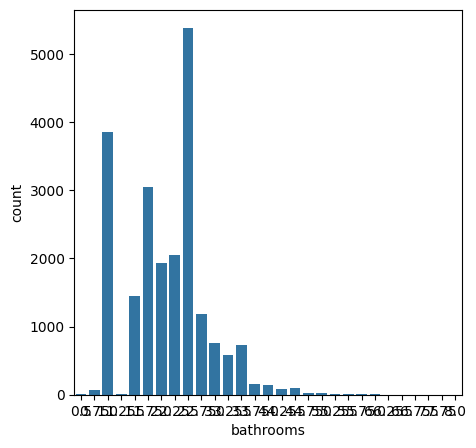

In [115]:
#visualize value counts for bathrooms
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='bathrooms')
plt.show()

In [116]:
df['bathrooms'].value_counts()

bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

In [117]:

df['bathrooms'].nunique()

29

In [118]:
#how many bathrooms are there between 2-3
df['bathrooms'].between(2, 3).sum()

11292

In [119]:
#between 3 and above
df['bathrooms'].between(3, 8).sum()

2630

In [120]:
#between 0-2
df['bathrooms'].between(0, 2).sum()

10358

In [121]:
df['bathrooms'].describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

we will have to regroup bathrooms to reduce variables, since we are treating it as a categorical data

we will create a bin for bathrooms 
we will group: <br>
0-2 == 0 <br>
2-3 ==1 <br>
3-above ==2 

In [122]:
#create a bin, assign value 1 if the number of bathrooms is between 2-3, 2 if between 3-8, 0 if between 0-2
df['bathrooms_cat'] = df['bathrooms'].apply(lambda x: 1 if x >= 2 and x <= 3 else (2 if x > 3 and x <= 8 else 0))


In [123]:
#check columns
df.columns

Index(['sqft_above', 'sqft_lot15', 'sqft_living15', 'id', 'waterfront', 'view',
       'condition', 'grade', 'bedrooms', 'bathrooms', 'sqft_basement_cat',
       'floors', 'yr_built_cat', 'zip', 'id', 'price', 'bathrooms_cat'],
      dtype='object')

final cleaning, drop multiple columns

In [124]:
#drop second id, located in column index 14
df.drop(df.columns[14], axis=1, inplace=True)

In [125]:
#check columns
df.columns

Index(['sqft_above', 'sqft_lot15', 'sqft_living15', 'waterfront', 'view',
       'condition', 'grade', 'bedrooms', 'bathrooms', 'sqft_basement_cat',
       'floors', 'yr_built_cat', 'zip', 'price', 'bathrooms_cat'],
      dtype='object')

In [126]:
df.shape

(21597, 15)

In [127]:
#save data
df.to_csv('../data/cleaned/data_with_outliers.csv', index=False)

## getting an additional dataframe
An additional frame to evaluate in case our power transformation doesn´t work?

In [128]:
#make a copy of categorical data
cat_df2 = cat_df.copy()

#drop bathrooms from
cat_df2.drop('bathrooms', axis=1, inplace=True)

In [129]:
#new_df
# concat numerical and categorical and price data
new_df = pd.concat([num_df, cat_df2, target_df], axis=1)

In [131]:
#save new_df
new_df.to_csv('../data/cleaned/data_with_outliers2.csv', index=False)